# Tutorial 4. Classification

# (Example) Churn prediction: Who will leave?

- **GOAL**: predicting whether a customer will change telecommunications provider, something known as "churning".

# Data

- The training dataset contains 4250 samples.
- Each sample contains 9 features and 1 boolean variable "churn" which indicates the class of the sample. 


#### Input features (9 features)

|  Feature |  Data   Type |  Description |
|---|---|---|
|  "account_length" |  numerical |  Number of months the customer has   been with the current telco provider |
|  "international_plan" |  boolean (yes/no) |  The customer has international   plan |
|  "voice_mail_plan" |  boolean (yes/no) |  The customer has voice mail plan |
|  "number_vmail_messages" |  numerical |  Number of voice-mail messages |
|  "total_charge" |  numerical |  Total charge of calls |
|  "total_calls_cnt" |  numerical |  Total number of calls |
|  "total_minutes" |  numerical |  Total minutes of calls |
|  "total_intl_charge" |  numerical |  Total charge of international   calls |
|  "number_customer_service_calls" |  numerical |  Number of calls to customer   service |

#### Output feature (boolean)
|  Feature |  Data   Type |  Description |
|---|---|---|
|  "churn" |  boolean (yes/no) | Customer churn - target variable |

In [1]:
import pandas as pd

df = pd.read_csv('churn_preprocessed.csv')
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_charge,total_calls_cnt,total_minutes,total_intl_charge,number_customer_service_calls,churn
0,107,no,yes,26,55.54,329,611.5,3.70,1,no
1,137,no,no,0,59.00,328,527.2,3.29,0,no
2,84,yes,no,0,65.02,248,558.2,1.78,2,no
3,75,yes,no,0,49.36,356,501.9,2.73,3,no
4,121,no,yes,24,76.28,314,779.3,2.03,3,no


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   international_plan             4250 non-null   object 
 2   voice_mail_plan                4250 non-null   object 
 3   number_vmail_messages          4250 non-null   int64  
 4   total_charge                   4250 non-null   float64
 5   total_calls_cnt                4250 non-null   int64  
 6   total_minutes                  4250 non-null   float64
 7   total_intl_charge              4250 non-null   float64
 8   number_customer_service_calls  4250 non-null   int64  
 9   churn                          4250 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 332.2+ KB


Transform non-numerical values into numerical values

In [3]:
df['churn'] = df['churn'].map({'no': 0, 'yes': 1})
df['international_plan'] = df['international_plan'].map({'no': 0, 'yes': 1})
df['voice_mail_plan'] = df['voice_mail_plan'].map({'no': 0, 'yes': 1})

In [4]:
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_charge,total_calls_cnt,total_minutes,total_intl_charge,number_customer_service_calls,churn
0,107,0,1,26,55.54,329,611.5,3.70,1,0
1,137,0,0,0,59.00,328,527.2,3.29,0,0
2,84,1,0,0,65.02,248,558.2,1.78,2,0
3,75,1,0,0,49.36,356,501.9,2.73,3,0
4,121,0,1,24,76.28,314,779.3,2.03,3,0


In [5]:
df.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_charge,total_calls_cnt,total_minutes,total_intl_charge,number_customer_service_calls,churn
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,0.093176,0.261647,7.631765,56.683586,299.923294,580.961388,2.769654,1.559059,0.140706
std,39.698401,0.290714,0.439583,13.439882,10.334156,34.405153,88.823648,0.745204,1.311434,0.347759
min,1.000000,0.000000,0.000000,0.000000,19.980000,188.000000,275.200000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,0.000000,0.000000,49.592500,277.000000,521.125000,2.300000,1.000000,0.000000
50%,100.000000,0.000000,0.000000,0.000000,56.680000,300.000000,581.400000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,16.000000,63.447500,323.000000,640.900000,3.240000,2.000000,0.000000
max,243.000000,1.000000,1.000000,52.000000,92.560000,410.000000,876.900000,5.400000,9.000000,1.000000


In [6]:
df.isna().sum()

account_length                   0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_charge                     0
total_calls_cnt                  0
total_minutes                    0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

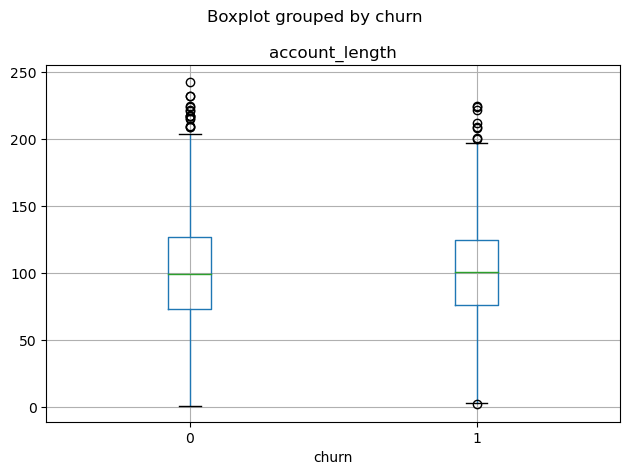

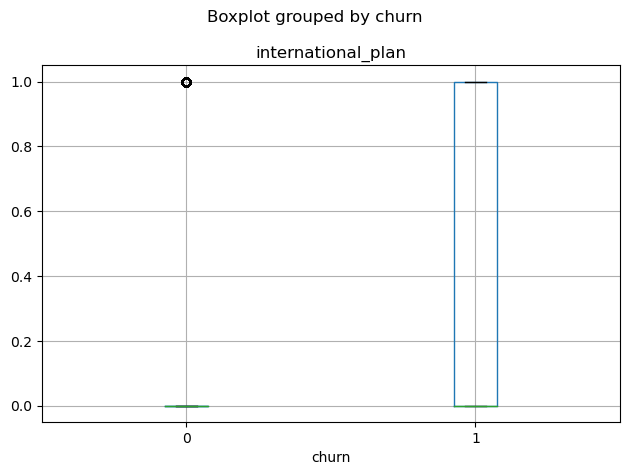

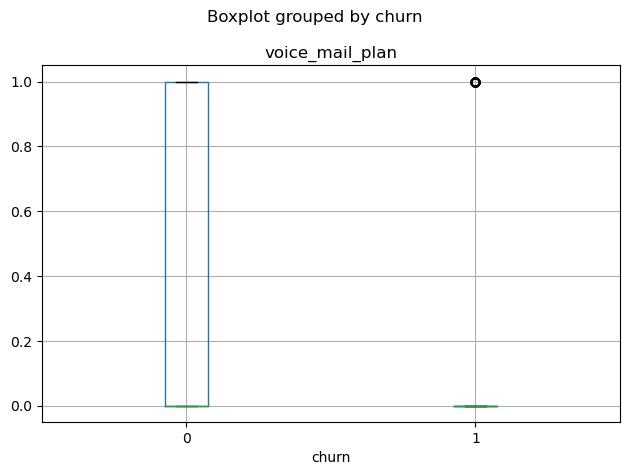

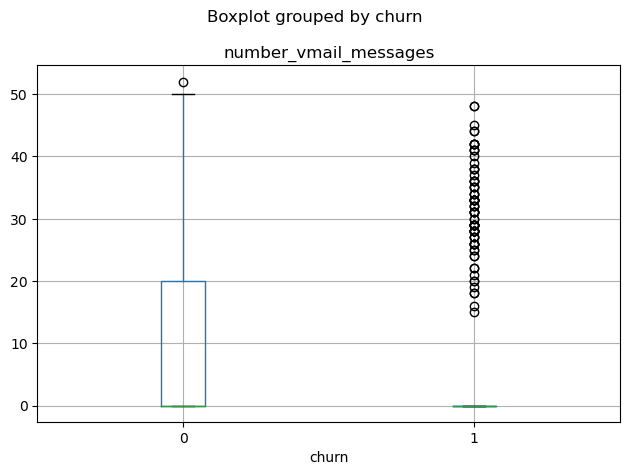

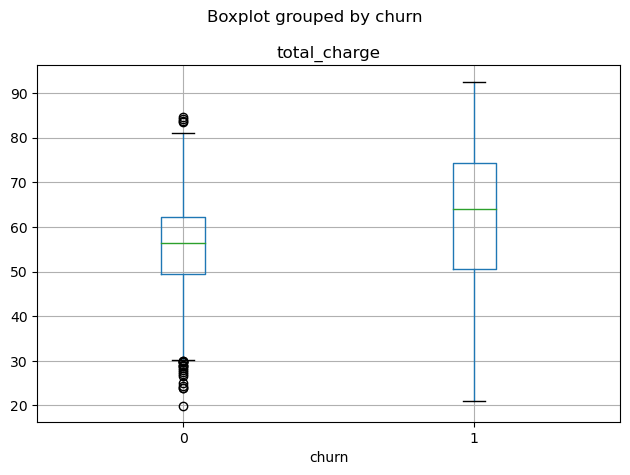

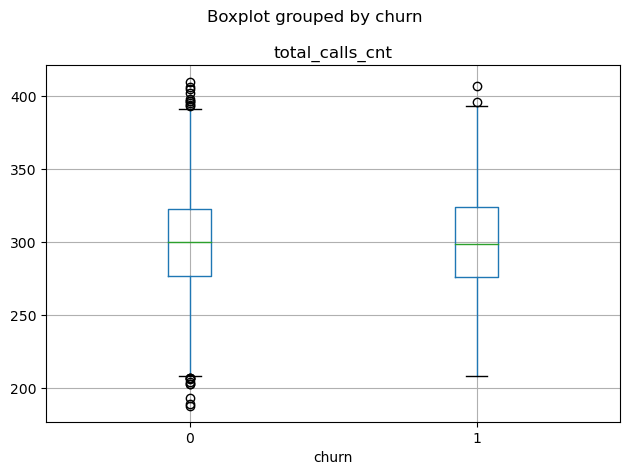

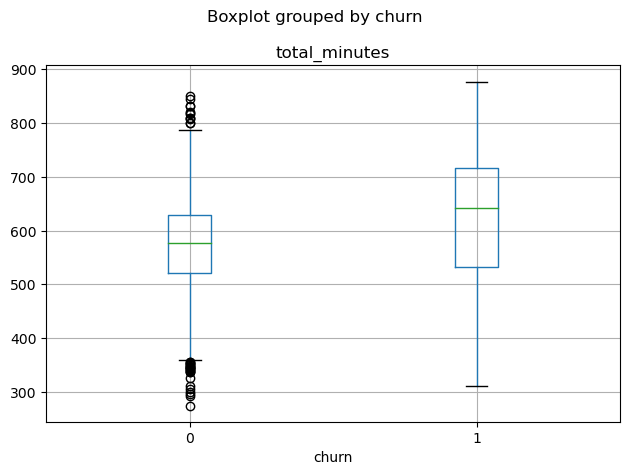

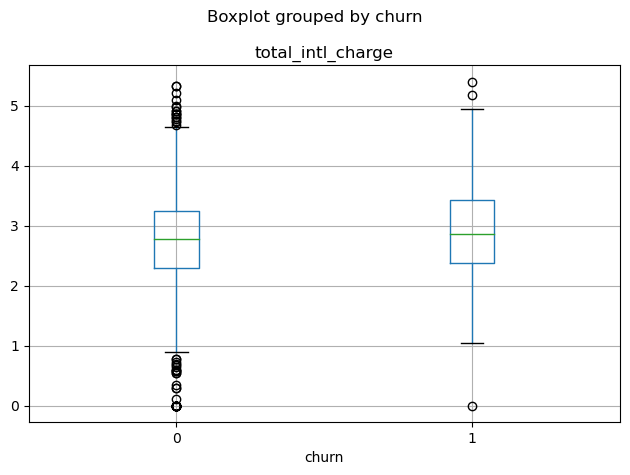

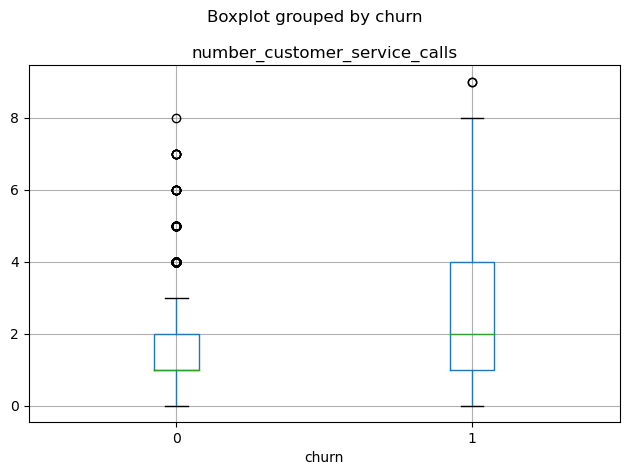

In [7]:
# data exploration: which feature is effective for discriminating "churn"?
import matplotlib.pyplot as plt

for col in df.columns[:-1]:
    df.boxplot(column=col, by='churn')
    plt.tight_layout()
    plt.show()

# 0. Define X and y

Set input `X` and output `y`. Then, check the ratio of positive samples.

In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.shape, y.shape, y.sum() / len(y)

((4250, 9), (4250,), 0.14070588235294118)

The ratio of positive samples is **0.141**.

If we classify all samples to the negative class (`churn=no`), the accuracy will be 0.859.

Q. In this case, what is precision, recall, and f1 score?

# 1. Data Split

Split data into training and test data sets.

In [9]:
from sklearn.model_selection import train_test_split

X_trn, X_val, y_trn, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

The `stratify` option enables the positive and negative samples to be equally partitioned into training and test data sets.

In [10]:
print('The ratio of positive samples in training data: {:.2f}%'
      .format(sum(y_trn)/len(y_trn)))
print('The ratio of positive samples in validation data: {:.2f}%'
      .format(sum(y_val)/len(y_val)))

The ratio of positive samples in training data: 0.14%
The ratio of positive samples in validation data: 0.14%


# 1-1. Data Normalization

We normalize data to avoid some problems (e.g., in K-NN, large-valued features weight too much in the Euclidean Distance).

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_trn)

X_trn_norm = scaler.transform(X_trn)
X_val_norm = scaler.transform(X_val)

# 2. Model Training

### 5 models
- `DecisionTreeClassifier` (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- `GaussianNB` (https://scikit-learn.org/stable/modules/naive_bayes.html)
- `KNeighborsClassifier` (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- `LogisticRegression` (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- `RandomForestClassifier` (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Some models use `X_trn` while others use `X_trn_norm`. Why?

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf_dt = DecisionTreeClassifier(max_depth=3) # define a model
clf_dt.fit(X_trn, y_trn) # train a model

clf_nb = GaussianNB()
clf_nb.fit(X_trn, y_trn)

clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_trn_norm, y_trn)

clf_lr = LogisticRegression()
clf_lr.fit(X_trn_norm, y_trn)

clf_rf = RandomForestClassifier()
clf_rf.fit(X_trn, y_trn)

print('trainining finished.')

trainining finished.


### Model Exploration: Decision Tree

Visualize the decision tree

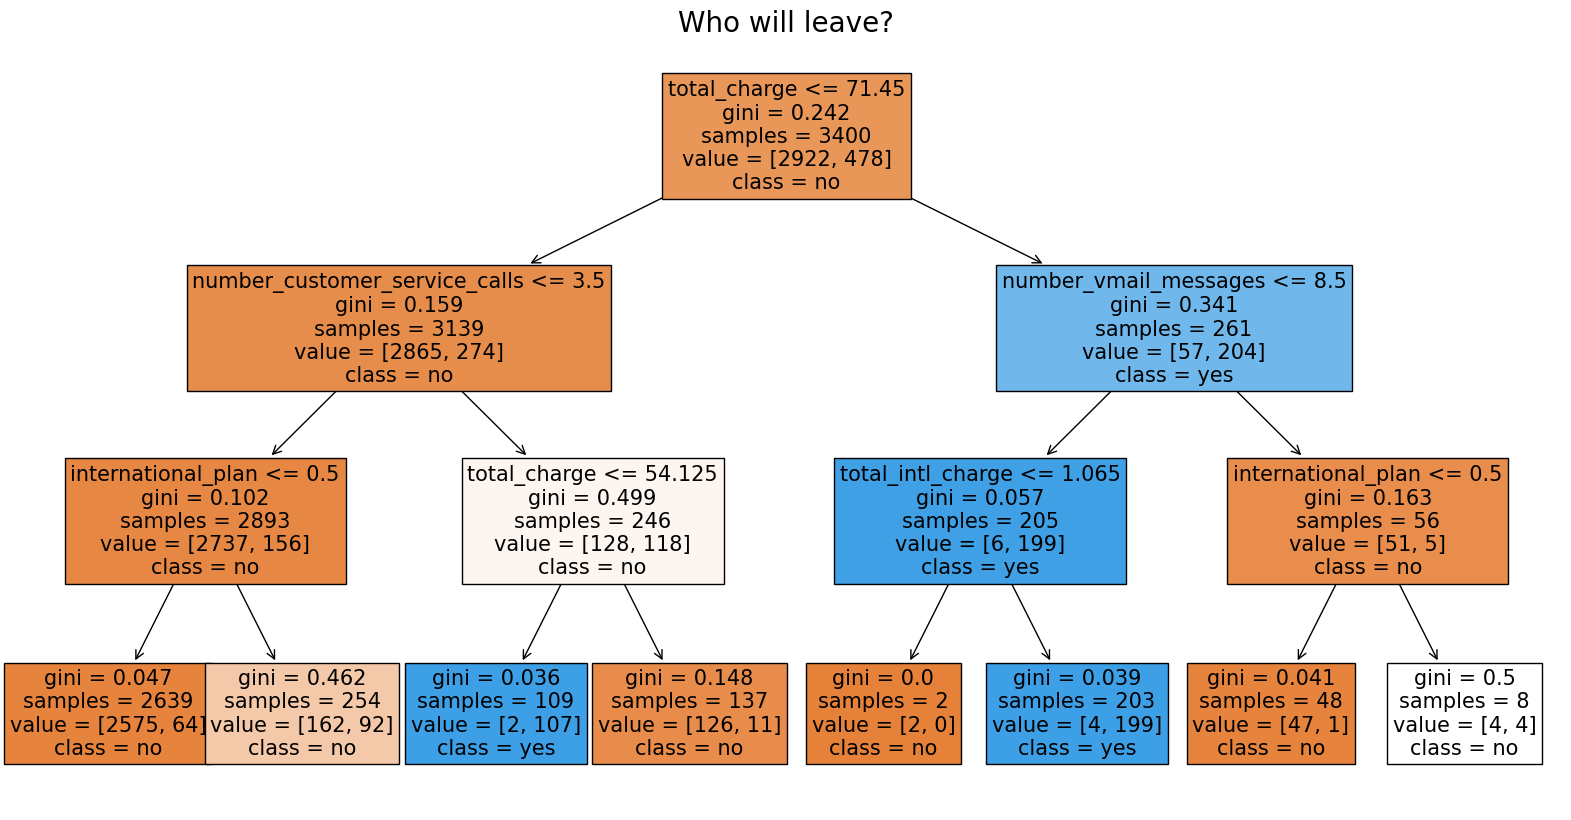

In [13]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots(figsize=(20, 10))
plot_tree(clf_dt, feature_names=X.columns, class_names=['no', 'yes'], filled=True, fontsize=15)
plt.title('Who will leave?', fontsize=20)
# plt.tight_layout()
plt.show()

### Model Exploration: Logistic Regression

Check model coefficients.

In [14]:
clf_lr.coef_, clf_lr.intercept_

(array([[ 0.02361129,  0.64011638, -0.99739816,  0.53388034,  0.84186532,
         -0.04236063,  0.03676903,  0.21787992,  0.72750594]]),
 array([-2.41593196]))

In [27]:
# check the coefficient values of input variables
for name, coeff in zip(X_trn.columns, clf_lr.coef_.squeeze()):
    print('{:<30}: {}'.format(name, coeff))

account_length                : 0.02361129
international_plan            : 0.64011638
voice_mail_plan               : -0.99739816
number_vmail_messages         : 0.53388034
total_charge                  : 0.84186532
total_calls_cnt               : -0.04236063
total_minutes                 : 0.03676903
total_intl_charge             : 0.21787992
number_customer_service_calls : 0.72750594


In [26]:
# if you want to sort the values ...
zipped = zip(X_trn.columns, clf_lr.coef_.squeeze())
zipped = sorted(zipped, key=lambda x: x[1])
for name, coeff in zipped:
    print('{:<30}: {}'.format(name, coeff))

voice_mail_plan               : -0.99739816
total_calls_cnt               : -0.04236063
account_length                : 0.02361129
total_minutes                 : 0.03676903
total_intl_charge             : 0.21787992
number_vmail_messages         : 0.53388034
international_plan            : 0.64011638
number_customer_service_calls : 0.72750594
total_charge                  : 0.84186532


Which features have a big impact on churn? Which features are important or not?

### Model Exploration: Random Forest

Random forest provides a powerful information: feature importance.

We can check feature importance scores of the model.

In [16]:
clf_rf.feature_importances_

array([0.05280445, 0.08492883, 0.03685913, 0.04836361, 0.36460652,
       0.05128511, 0.13153306, 0.08954527, 0.140074  ])

Let's print feature names as well.

In [17]:
for name, fi in zip(X_trn.columns, clf_rf.feature_importances_):
    print('{:<30}: {}'.format(name, fi))

account_length                : 0.05280444835500996
international_plan            : 0.08492883348963857
voice_mail_plan               : 0.03685913485275676
number_vmail_messages         : 0.04836361474353075
total_charge                  : 0.3646065185872262
total_calls_cnt               : 0.051285108627420535
total_minutes                 : 0.13153306441076965
total_intl_charge             : 0.08954527445906989
number_customer_service_calls : 0.14007400247457763


How about sorting the feature importance scores?

In [18]:
import numpy as np

indices = np.argsort(clf_rf.feature_importances_)
for i in indices:
    print('{:<30}: {}'.format(X_trn.columns[i], clf_rf.feature_importances_[i]))

voice_mail_plan               : 0.03685913485275676
number_vmail_messages         : 0.04836361474353075
total_calls_cnt               : 0.051285108627420535
account_length                : 0.05280444835500996
international_plan            : 0.08492883348963857
total_intl_charge             : 0.08954527445906989
total_minutes                 : 0.13153306441076965
number_customer_service_calls : 0.14007400247457763
total_charge                  : 0.3646065185872262


# 3. Model Validation

We will use 5 evaluation metrics.
- Accuracy
- Precision
- Recall
- F1 score
- AUC (+ROC Curve)

Functions available by `sklearn.metrics` (https://scikit-learn.org/stable/modules/model_evaluation.html)

The first four metrics can be measured using `evaluate` function below:

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    fscore = f1_score(y_true, y_pred)
    print('Accuracy: {:.2f}%'.format(accuracy*100))
    print('Precision: {:.2f}%'.format(precision*100))
    print('Recall: {:.2f}%'.format(recall*100))
    print('Fscore: {:.2f}%'.format(fscore*100))

In [20]:
for clf, name in zip(
    [clf_dt, clf_knn, clf_nb, clf_lr, clf_rf], 
    ['Decision Tree', 'k-NN', 'Naive Bayes', 'Logistic Regression', 'Random Forest']
):
    if name in ['k-NN', 'Logistic Regression']:
        y_val_pred = clf.predict(X_val_norm) # assume cutoff=0.5
    else:
        y_val_pred = clf.predict(X_val) # assume cutoff=0.5
    print('Model: {}'.format(name))
    evaluate(y_val, y_val_pred)
    print()

Model: Decision Tree
Accuracy: 94.35%
Precision: 97.37%
Recall: 61.67%
Fscore: 75.51%

Model: k-NN
Accuracy: 91.06%
Precision: 85.48%
Recall: 44.17%
Fscore: 58.24%

Model: Naive Bayes
Accuracy: 84.24%
Precision: 44.26%
Recall: 45.00%
Fscore: 44.63%

Model: Logistic Regression
Accuracy: 84.71%
Precision: 40.38%
Recall: 17.50%
Fscore: 24.42%

Model: Random Forest
Accuracy: 94.94%
Precision: 93.26%
Recall: 69.17%
Fscore: 79.43%



Which model is the best?

### ROC Curve

Draw roc curve to visualize trade-off between FPR and TPR. We can also calculate AUC scores.

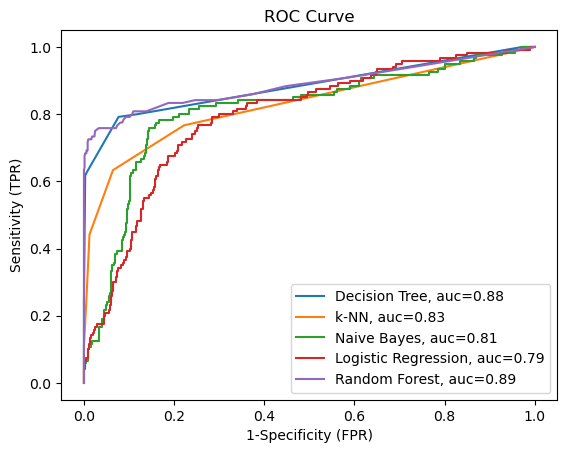

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

for clf, name in zip(
    [clf_dt, clf_knn, clf_nb, clf_lr, clf_rf], 
    ['Decision Tree', 'k-NN', 'Naive Bayes', 'Logistic Regression', 'Random Forest']
):
    # probability score of positive class
    if name in ['k-NN', 'Logistic Regression']:
        y_val_pred_proba = clf.predict_proba(X_val_norm)[:, 1] 
    else:
        y_val_pred_proba = clf.predict_proba(X_val)[:, 1] 
    
    # get fpr and tpr arrays
    fpr, tpr, _ = roc_curve(y_val,  y_val_pred_proba) 
    # get auc
    auc = roc_auc_score(y_val, y_val_pred_proba) 
    # plot
    plt.plot(fpr, tpr, label="{}, auc={:.2f}".format(name, auc))

plt.legend(loc=4)
plt.xlabel('1-Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('ROC Curve')
plt.show()

Which model is the best?

# 4. Model Test

Apply the random forest model to predict churn of 750 new customers!

In [37]:
df_test = pd.read_csv('churn_test_preprocessed.csv')
df_test.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_charge,total_calls_cnt,total_minutes,total_intl_charge,number_customer_service_calls
0,128,no,yes,25,72.86,300,707.2,2.70,1
1,118,yes,no,0,65.91,317,647.9,1.70,0
2,62,no,no,0,55.77,245,630.9,3.54,4
3,93,no,no,0,56.80,346,538.5,2.19,3
4,174,no,no,0,55.96,303,652.1,4.19,3


This data only contains input variables, not target.

In [38]:
df_test.shape

(750, 9)

To use the model, we have to apply **the same data processing method**.

In [39]:
# Transform non-numerical input values into numerical values
df_test['international_plan'] = df_test['international_plan'].map({'no': 0, 'yes': 1})
df_test['voice_mail_plan'] = df_test['voice_mail_plan'].map({'no': 0, 'yes': 1})

# define X
X_tst = df_test

# data normalization
# X_tst_norm = scaler.transform(X_tst) # not necessary for random forest

Apply the random forest model for churn prediction.

In [41]:
y_tst_pred = clf_rf.predict(X_tst)

In [42]:
y_tst_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [43]:
# the ratio of churn customers
y_tst_pred.sum() / len(y_tst_pred)

0.11466666666666667